In [3]:
# Paso 5: Regresión Logística

# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el conjunto de datos
df = pd.read_csv('waze_dataset.csv')
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [11]:
# Preprocesar los datos
df.dropna(inplace=True)  # Eliminar valores faltantes
X = df[['sessions', 'drives', 'total_sessions']]  # Seleccionar características
y = df['label'].apply(lambda x: 1 if x == 'retained' else 0)  # Convertir a variable binaria (1 para retenido, 0 para no retenido)

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Crear un modelo de regresión logística
log_reg = LogisticRegression()


In [17]:
# Entrenar el modelo
log_reg.fit(X_train, y_train)


LogisticRegression()

In [19]:
# Hacer predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

In [21]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Imprimir las métricas de evaluación
print(f"Exactitud: {accuracy}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Informe de Clasificación:\n{class_report}")

Exactitud: 0.8174825174825174
Matriz de Confusión:
[[   0  783]
 [   0 3507]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       783
           1       0.82      1.00      0.90      3507

    accuracy                           0.82      4290
   macro avg       0.41      0.50      0.45      4290
weighted avg       0.67      0.82      0.74      4290



Como el modelo está prediciendo únicamente la clase "1" (usuarios retenidos), es probable que haya un desbalance de clases en los datos. Esto hace que el modelo no identifique correctamente los usuarios no retenidos. Podríamos intentar mejorar el modelo balanceando las clases o utilizando otro enfoque.

In [9]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.2 MB/s eta 0:00:00a 0:00:01m


In [59]:
from sklearn.model_selection import cross_val_score

In [30]:
# Importar las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística con los datos balanceados
log_reg_resampled = LogisticRegression()
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = log_reg_resampled.predict(X_test_resampled)

# Crear el informe de clasificación
class_report_resampled = classification_report(y_test_resampled, y_pred_resampled)

# Mostrar los resultados
print(f"Exactitud: {accuracy_resampled}")
print(f"Informe de Clasificación:\n{class_report_resampled}")

Exactitud: 0.5097761405497307
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44      3542
           1       0.51      0.64      0.57      3516

    accuracy                           0.51      7058
   macro avg       0.51      0.51      0.50      7058
weighted avg       0.51      0.51      0.50      7058



A pesar de tener resultados menores, es una muestra de predicción más fiable y creíble ante nuestro conjunto de datos. Intentaremos aplicar otros modelos para que podamos afianzar mejores resultados.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [39]:
# Comparar diferentes modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [41]:
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_resampled, y_train_resampled)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred_resampled = model.predict(X_test_resampled)
    
    # Evaluar el modelo
    accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
    conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
    class_report_resampled = classification_report(y_test_resampled, y_pred_resampled)

In [71]:
  # Imprimir los resultados
print(f"--- {name} ---")
print(f"Exactitud: {accuracy_resampled}")
print(f"Matriz de Confusión:\n{conf_matrix_resampled}")
print(f"Informe de Clasificación:\n{class_report_resampled}")

--- SVM ---
Exactitud: 0.5103428733352224
Matriz de Confusión:
[[ 628 2914]
 [ 542 2974]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.18      0.27      3542
           1       0.51      0.85      0.63      3516

    accuracy                           0.51      7058
   macro avg       0.52      0.51      0.45      7058
weighted avg       0.52      0.51      0.45      7058



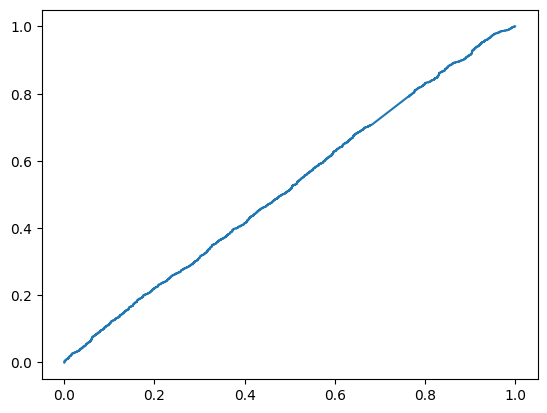

In [51]:
# Calcular las probabilidades para la curva ROC
y_probs_resampled = model.predict_proba(X_test_resampled)[:, 1]
    
    # Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_resampled, y_probs_resampled)
auc_score = roc_auc_score(y_test_resampled, y_probs_resampled)
    
    # Graficar la curva ROC
plt.plot(fpr, tpr, label=f'{name} AUC = {auc_score:.2f}')

/var/folders/zq/qf312yqs5wnb29fvj3txfrqm0000gn/T/ipykernel_5488/2220231524.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


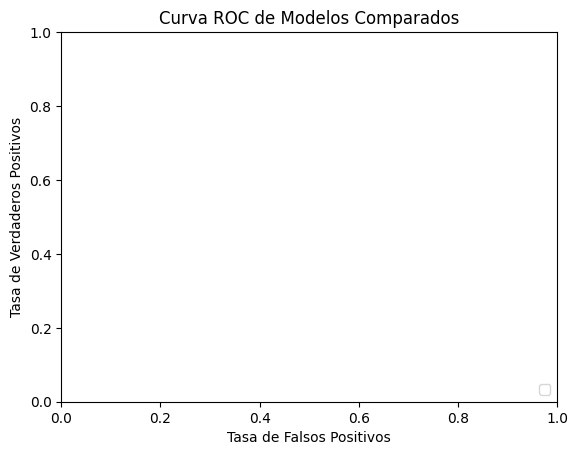

In [55]:
# Graficar todas las curvas ROC
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de Modelos Comparados')
plt.legend(loc='lower right')
plt.show()

In [61]:
# Validación cruzada para el modelo de Regresión Logística
log_reg = LogisticRegression()
cross_val_scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Exactitud media en la validación cruzada (Regresión Logística): {cross_val_scores.mean()}")

Exactitud media en la validación cruzada (Regresión Logística): 0.5113068220053266


In [67]:
 # Importancia de características (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
importances = rf_model.feature_importances_

    # Mostrar la importancia de cada característica
feature_names = ['sessions', 'drives', 'total_sessions']
for feature, importance in zip(feature_names, importances):
    print(f'Importancia de {feature}: {importance:.4f}')

Importancia de sessions: 0.1929
Importancia de drives: 0.1812
Importancia de total_sessions: 0.6259
